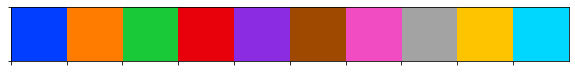

In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# try different palette for plotting
# sns.set_palette(sns.color_palette("Paired", 20))
# sns.set_palette(sns.diverging_palette(255, 133, l=60, n=16, center="dark"))
colors3 = ["#9d6d00", "#903ee0", "#11dc79", "#f568ff", "#419500", "#013fb0", 
          "#f2b64c", "#007ae4", "#ff905a", "#33d3e3", "#9e003a", "#019085", 
          "#950065", "#afc98f", "#ff9bfa", "#83221d", "#01668a", "#ff7c7c", 
          "#643561", "#75608a"]
palette1 = sns.color_palette("BuGn", 6)[::-1][:4] \
           + sns.color_palette("OrRd", 6)[1:] \
           + sns.color_palette("PuBu", 6)[::-1][:-2] \
           + sns.color_palette("RdGy", 10)[6:]
# sns.set_palette(palette1)
sns.set_palette("bright",10)
sns.palplot(sns.color_palette())

In [2]:
# confirmed COVID-19 positive cases for Italy
data2 = pd.read_csv("../external_data/dpc-covid19-ita-regioni.csv")
data2 = data2.drop(["note_it", "note_en", "stato", "codice_regione", "lat", "long"], axis=1)
max_date = data2['data'].max()
data2 = data2[data2['data'] == data2['data'].max()] 
data2.loc['Italy']= data2.sum()
data2.tail(10)

,data,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
852,2020-04-04T17:00:00,Piemonte,3441,450,3891,5802,9693,563,813,888,1128,11709,37181
853,2020-04-04T17:00:00,Puglia,627,153,780,1193,1973,24,58,94,173,2240,18977
854,2020-04-04T17:00:00,Sardegna,123,24,147,642,789,45,49,44,41,874,6789
855,2020-04-04T17:00:00,Sicilia,553,74,627,1099,1726,62,73,95,111,1932,19896
856,2020-04-04T17:00:00,Toscana,1129,286,1415,3639,5054,145,172,310,307,5671,47886
857,2020-04-04T17:00:00,P.A. Trento,353,81,434,1319,1753,94,111,257,210,2220,9863
858,2020-04-04T17:00:00,Umbria,167,44,211,716,927,7,31,242,41,1210,11809
859,2020-04-04T17:00:00,Valle d'Aosta,63,23,86,474,560,0,29,106,82,748,2274
860,2020-04-04T17:00:00,Veneto,1691,324,2015,7078,9093,232,360,1124,607,10824,133289
Italy,2020-04-04T17:00:002020-04-04T17:00:002020-04-...,AbruzzoBasilicataP.A. BolzanoCalabriaCampaniaE...,29010,3994,33004,55270,88274,2886,4805,20996,15362,124632,657224


In [3]:
data2 = pd.read_csv("../external_data/dpc-covid19-ita-regioni.csv")
data2 = data2.drop(["note_it", "note_en", "stato", "codice_regione", "lat", "long"], axis=1)
conf_vs_deaths_vs_healed = pd.DataFrame(columns = data2.columns.to_list())
for date, subdf in data2.groupby('data'):
    subdf = subdf.drop(["data", "denominazione_regione"], axis=1)
    subdf.loc[date]= subdf.sum(numeric_only=True, axis=0)
    conf_vs_deaths_vs_healed = conf_vs_deaths_vs_healed.append(subdf.iloc[-1:])

conf_vs_deaths_vs_healed = conf_vs_deaths_vs_healed.drop(["data", "denominazione_regione"], axis=1)

# print(conf_vs_deaths_vs_healed.head())

Text(0, 0.5, 'Totals')

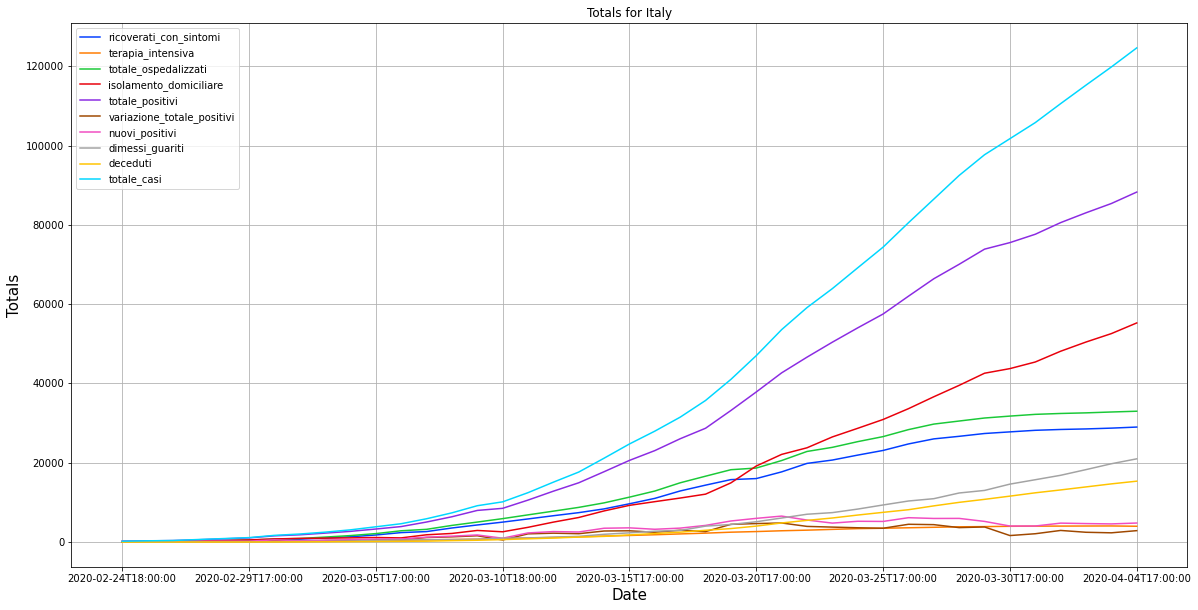

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=1)
conf_vs_deaths_vs_healed.drop(["tamponi"], axis=1).plot(
    grid=True, ax=axes, title="Totals for Italy", figsize = (20,10))
axes.set_xlabel("Date", fontsize=15)
axes.set_ylabel("Totals", fontsize=15)

Text(0, 0.5, 'Totals')

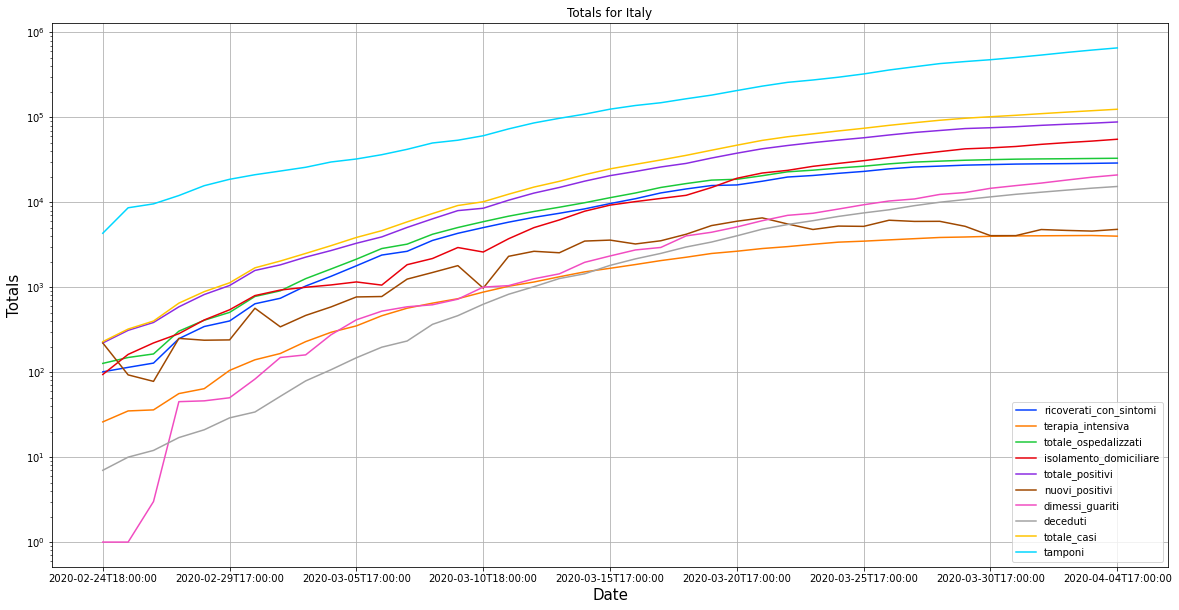

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=1)
conf_vs_deaths_vs_healed.drop(["variazione_totale_positivi"], axis=1).plot(
    grid=True, ax=axes, title="Totals for Italy", figsize = (20,10), logy=True)
axes.set_xlabel("Date", fontsize=15)
axes.set_ylabel("Totals", fontsize=15)

Text(0, 0.5, 'Daily')

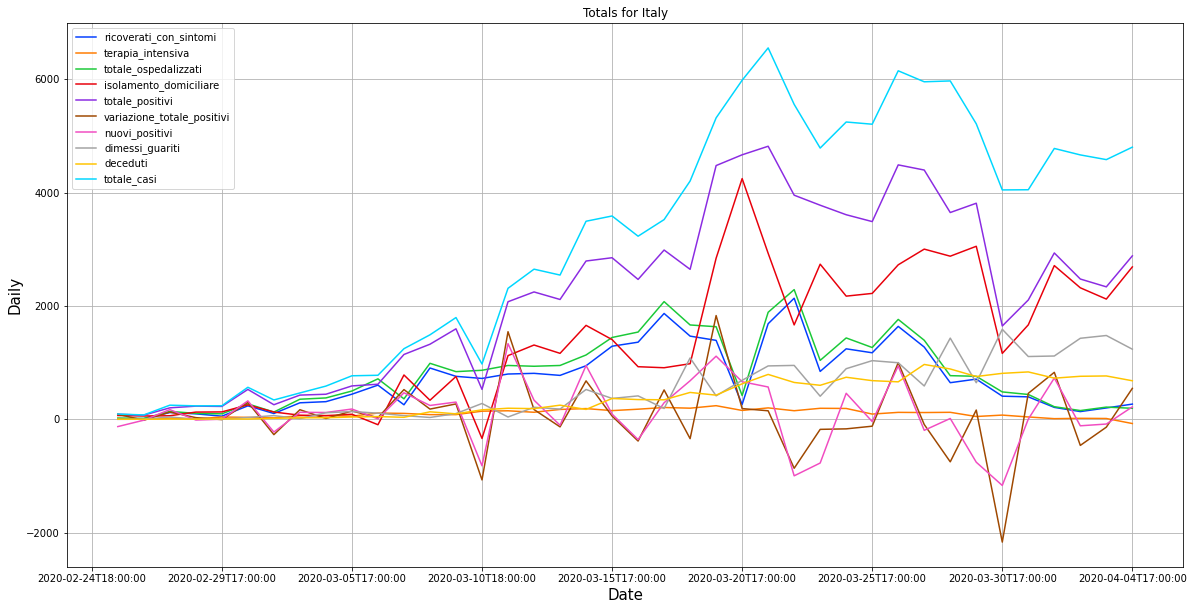

In [6]:
conf_vs_deaths_vs_healed_daily = conf_vs_deaths_vs_healed - conf_vs_deaths_vs_healed.shift(1)

fig, axes = plt.subplots(nrows=1, ncols=1)

conf_vs_deaths_vs_healed_daily.drop(["tamponi"], axis=1).plot(
    grid=True, ax=axes, title="Totals for Italy", figsize = (20,10))
axes.set_xlabel("Date", fontsize=15)
axes.set_ylabel("Daily", fontsize=15)

Text(0, 0.5, 'Daily')

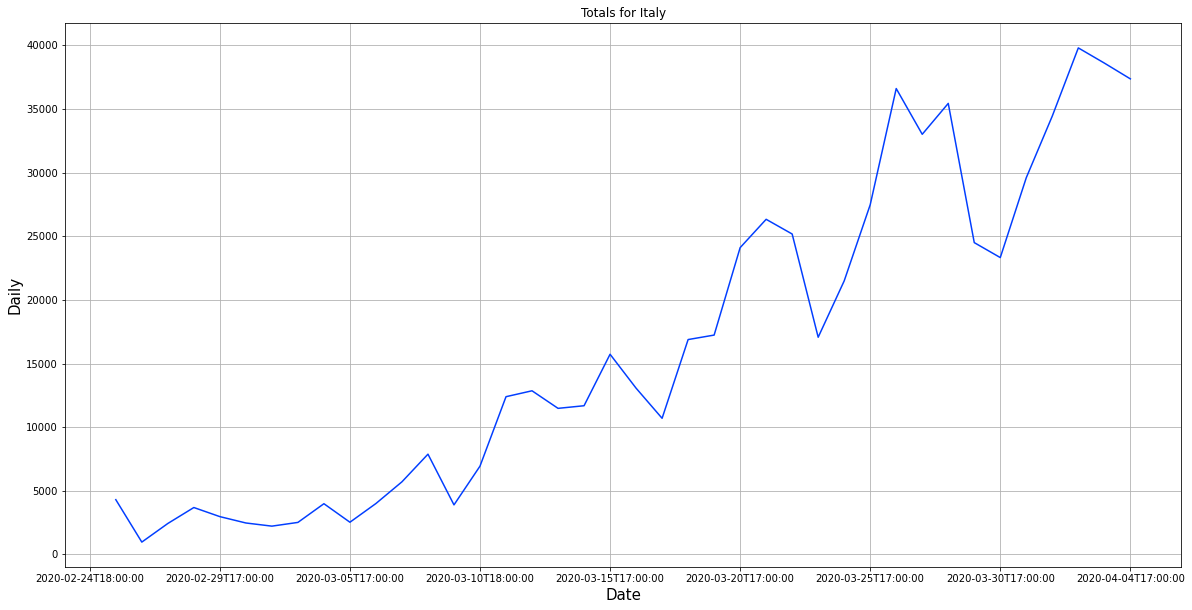

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=1)

conf_vs_deaths_vs_healed_daily["tamponi"].plot(
    grid=True, ax=axes, title="Totals for Italy", figsize = (20,10))
axes.set_xlabel("Date", fontsize=15)
axes.set_ylabel("Daily", fontsize=15)